This notebook serves to make some simple plots of the 1) losses and 2) entities and relations following training with the PyKEEN pipeline.

In [1]:
import os
import sys
import time

import numpy as np
import pykeen
from matplotlib import pyplot as plt

from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
print(sys.version)

3.8.3 (default, Jul  7 2020, 13:04:12) 
[Clang 11.0.3 (clang-1103.0.32.62)]


In [4]:
print(pykeen.get_version(with_git_hash=True))

1.0.5-dev-937829af


In [5]:
print(time.asctime())

Sun Oct 11 23:49:47 2020


## Toy Example

Following the disussions proposed in https://github.com/pykeen/pykeen/issues/97, a very small set of triples are trained and visualized.

In [6]:
triples = '''
Brussels	locatedIn	Belgium
Belgium	partOf	EU
EU	hasCapital	Brussels
'''.strip()

triples = np.array([triple.split('\t') for triple in triples.split('\n')])
tf = TriplesFactory(triples=triples)

In [7]:
toy_results = pipeline(
    training_triples_factory=tf,
    testing_triples_factory=tf,
    model='TransE',
    loss='softplus',
    model_kwargs=dict(embedding_dim=2),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device='cpu',
)

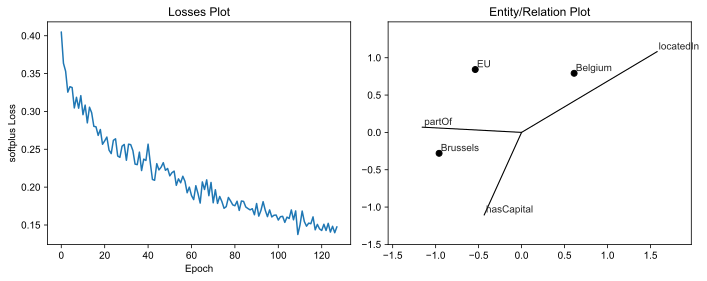

In [8]:
toy_results.plot()

## Benchmark Dataset Example

In [9]:
nations_results = pipeline(
    dataset='Nations',
    model='TransE',
    model_kwargs=dict(embedding_dim=8),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=80, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device='cpu',
)

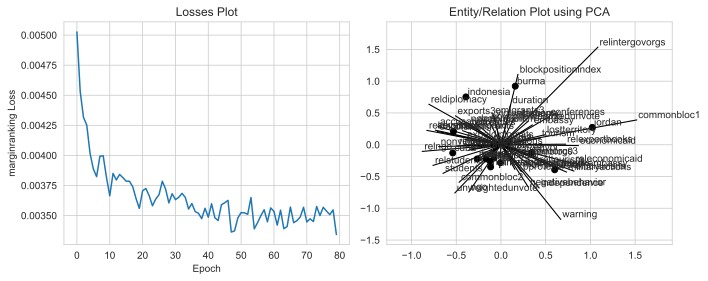

In [10]:
nations_results.plot()

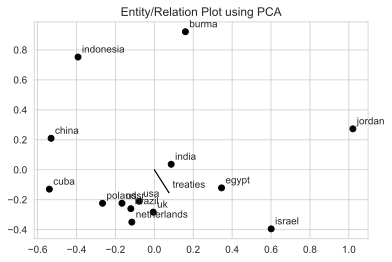

In [11]:
# Filter the ER plot down to a specific set of entities and relations
nations_results.plot_er(
    relations={'treaties'},
    apply_limits=False,
);